In [128]:
#importing useful libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
#Reading data
#from crime_dataset_headers import *
#data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
#crime=pd.read_csv(data_url, header=None, mames=headers, na_values='?', index_col='communityname')

In [130]:
#Change path to the file when needed.
df=pd.read_csv('C:\Data\Hiep(Duc)Project\POS_data_2018.csv')

In [131]:
df.head()

,Unnamed: 0,kind,invoice_closed,invoice_opened,guests,group,invoice,cancellation,ticket,table,time,article_number
0,0,Pasta,2017-12-31 12:21:00,2017-12-31 11:52:00,2,Essen,3790,0,2289,101/1,2017-12-31 11:52:00,206
1,1,Pasta,2017-12-31 12:21:00,2017-12-31 11:52:00,2,Speisen,3790,0,2289,101/1,2017-12-31 11:52:00,213
2,2,Limonaden,2017-12-31 12:21:00,2017-12-31 11:52:00,2,Getränke,3790,0,2289,101/1,2017-12-31 11:52:00,56
3,3,Undefiniert,2017-12-31 12:21:00,2017-12-31 11:52:00,2,Undefiniert,3790,0,2289,101/1,2017-12-31 11:52:00,262
4,4,Weisswein offen,2017-12-31 13:20:00,2017-12-31 12:18:00,5,Getränke,3794,0,2292,116/1,2017-12-31 12:18:00,334


In [132]:
import datetime as dt
def excel_date(dateStr):
    time1=dt.datetime.strptime(dateStr,'%Y-%m-%d %H:%M:%S')
    time2=dt.datetime(1899,12,30)
    delta=time1-time2
    return float(delta.days) + (float(delta.seconds)/86400)
    

In [133]:
excel_date('2017-12-31 12:21:00')

43100.51458333333

In [134]:
df['invoice_closed']=pd.to_datetime(df['invoice_closed'])
df['invoice_opened']=pd.to_datetime(df['invoice_opened'])
df['time']=pd.to_datetime(df['time'])

In [135]:
df['invoice_closed']=df['invoice_closed'].dt.strftime("%Y-%m-%d %H:%M:%S")
df['invoice_opened']=df['invoice_opened'].dt.strftime("%Y-%m-%d %H:%M:%S")
df['time']=df['time'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [136]:
df['invoice_closed'] = df.apply(lambda x: excel_date(x['invoice_closed']),axis=1)

In [137]:
df['invoice_opened'] = df.apply(lambda x: excel_date(x['invoice_opened']),axis=1)

In [139]:
df['time'] = df.apply(lambda x: excel_date(x['time']),axis=1)

In [140]:
df['invoice_closed'].head()

0    43100.514583
1    43100.514583
2    43100.514583
3    43100.514583
4    43100.555556
Name: invoice_closed, dtype: float64

In [151]:
feature_names=['invoice_closed','invoice_opened','guests',
               'invoice','cancellation','ticket','time']

target_name='article_number'

In [152]:
feature_names

['invoice_closed',
 'invoice_opened',
 'guests',
 'invoice',
 'cancellation',
 'ticket',
 'time']

In [153]:
target_name

'article_number'

In [154]:
X=df[feature_names]
y=df[target_name]

In [155]:
X.head()

,invoice_closed,invoice_opened,guests,invoice,cancellation,ticket,time
0,43100.514583,43100.494444,2,3790,0,2289,43100.494444
1,43100.514583,43100.494444,2,3790,0,2289,43100.494444
2,43100.514583,43100.494444,2,3790,0,2289,43100.494444
3,43100.514583,43100.494444,2,3790,0,2289,43100.494444
4,43100.555556,43100.512500,5,3794,0,2292,43100.512500


In [156]:
y.head()

0    206
1    213
2     56
3    262
4    334
Name: article_number, dtype: int64

In [157]:
#Split the data into: trainning and testing (cross-validation)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=123)

In [158]:
# Import the estimator object (model)
from sklearn.linear_model import LinearRegression

In [159]:
#Create an instance of the estimator
linear_regression_model=LinearRegression()

In [160]:
#Use the trainning data to train the estimator
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [162]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
# Get the predictions of the model for the data it has not seen (testing)
y_pred_test=linear_regression_model.predict(X_test)
#All the metrics compare in some way how close are the predicted vs. the actual values
error_metric=mean_squared_error(y_pred=y_pred_test,y_true=y_test)
print('The Mean Squqre Error of this model is: ',error_metric)

The Mean Squqre Error of this model is:  9408.60864518269


Text(0.5, 1.0, 'Predicted vs. Actual values')

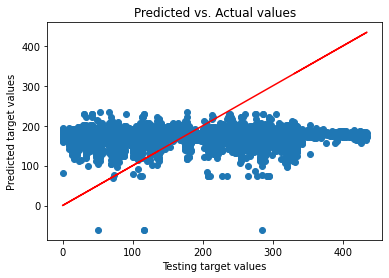

In [163]:
fig, ax=plt.subplots()
ax.scatter(y_test,y_pred_test)
ax.plot(y_test,y_test,color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs. Actual values')

In [164]:
X.head()

,invoice_closed,invoice_opened,guests,invoice,cancellation,ticket,time
0,43100.514583,43100.494444,2,3790,0,2289,43100.494444
1,43100.514583,43100.494444,2,3790,0,2289,43100.494444
2,43100.514583,43100.494444,2,3790,0,2289,43100.494444
3,43100.514583,43100.494444,2,3790,0,2289,43100.494444
4,43100.555556,43100.512500,5,3794,0,2292,43100.512500


In [165]:
#Make predictions
from collections import OrderedDict
new_data=OrderedDict([('invoice_closed',43100.555556),
                      ('invoice_opened',43100.512500),
                      ('guests',5),
                      ('invoice',3794),
                      ('cancellation',0),
                      ('ticket',2292),
                      ('time',43100.512500)
                     ])
#.values.reshape(1,-1) because it must be 2-dim, because we passed only one new observation
new_data=pd.Series(new_data).values.reshape(1,-1)
#Use the model to make predictions
linear_regression_model.predict(new_data)

array([182.08330638])

In [166]:
y.head()

0    206
1    213
2     56
3    262
4    334
Name: article_number, dtype: int64